# **ZDT3** Problem

In [1]:
%pip install pymoo --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.indicators.hv import Hypervolume
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.algorithms.moo.age import AGEMOEA
from pymoo.termination import get_termination


C:\Users\anny0\AppData\Roaming\Python\Python310\site-packages\pymoo\algorithms\moo\age.py:212: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
C:\Users\anny0\AppData\Roaming\Python\Python310\site-packages\pymoo\algorithms\moo\age.py:222: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
C:\Users\anny0\AppData\Roaming\Python\Pyth

## Funciones Auxiliares


In [11]:
#CALCULO DE MÉTRICAS
def calculate_metrics(front, ref_point):
    """Calcula las métricas: hipervolumen, dispersión (SPR) y espaciado (SPA)."""
    metricHV = Hypervolume(ref_point)
    hv = metricHV.do(front)

    # Dispersión: Diagonal de la hipercaja que contiene el frente
    min_values = np.min(front, axis=0)
    max_values = np.max(front, axis=0)
    spr = np.linalg.norm(max_values - min_values)

    # Espaciado: Distancia promedio entre puntos del frente
    d = np.linalg.norm(front[:, None, :] - front[None, :, :], axis=-1)
    spa = np.mean(np.min(d + np.diag(np.inf * np.ones(len(d))), axis=1))

    return hv, spr, spa


# **Algoritmos**

Se utilizan tres algoritmos para abordar problemas de optimización multiobjetivo, dos son implementaDOS USANDO PYMOO:
- **NSGA-II (Non-dominated Sorting Genetic Algorithm II)**
  NSGA-II se basa en la dominancia no dominada para clasificar las soluciones en diferentes frentes de Pareto. Su principal enfoque es mantener la diversidad entre las soluciones y asegurar que se mantengan un conjunto de soluciones no dominadas que representen bien el frente de Pareto. Utiliza un proceso de selección por torneo, y a través de operaciones de cruzamiento y mutación, genera nuevas soluciones. La selección de las mejores soluciones se realiza por un proceso de clasificación de frentes.

- **AGEMOEA (Adaptive Genetic and Evolutionary Multi-objective Evolutionary Algorithm)**
  A diferencia de NSGA-II, AGEMOEA tiene un enfoque adaptativo, ajustando dinámicamente parámetros como la tasa de mutación o cruzamiento durante el proceso evolutivo, dependiendo del comportamiento del algoritmo. Este ajuste adaptativo le permite ajustarse mejor a las características del problema, mejorando la convergencia y la distribución de soluciones en un espacio multiobjetivo. Aunque también utiliza operaciones de cruzamiento y mutación, la principal diferencia es su capacidad para modificar su estrategia de optimización en función de cómo evoluciona la población

El último es una propuesta obtenida del paper Li, H., & Zhang, Q. (2008). Multiobjective optimization problems with complicated Pareto sets, MOEA/D and NSGA-II. IEEE Transactions on Evolutionary Computation, 13(2), 284-302.
- **MOEA/D-DE (Multi-objective Evolutionary Algorithm based on Decomposition and Differential Evolution)**
  MOEA/D-DE se basa en la descomposición del problema multiobjetivo en varios subproblemas más simples, a los cuales se les aplica un enfoque de evolución diferencial. Cada subproblema se resuelve de forma independiente utilizando evolución diferencial, lo que permite una optimización más directa y especializada para cada subproblema. Este enfoque es especialmente útil en problemas con un conjunto de Pareto complicado o de alta dimensión. A diferencia de los otros dos algoritmos, MOEA/D-DE no utiliza dominancia no dominada ni clasificación por frentes, sino que se enfoca en resolver subproblemas, lo que le permite manejar mejor problemas con Pareto más complejo.


AGEMOEA (Adaptive Generational Evolutionary Multi-Objective Evolutionary Algorithm) es un algoritmo evolutivo diseñado para optimizar problemas multi-objetivo.
Estimar la geometría del frente de Pareto en cada generación de manera adaptativa, el algoritmo se adapta y ajusta a la forma real que tenga el frente de Pareto en ese momento. (no asume ninguna forma específica para el frente de Pareto como NSGAII si no que ajusta la forma en función de cómo se desarrolla el algoritmo.)

1. Generación inicial: Crear la población inicial aleatoria
2. Generación de descendencia: Crear nuevos individuos mediante cruce y mutación.
3. Clasificación no dominada: Ordenar las soluciones en frentes no dominados
4. Estimación de geometría del frente de Pareto: 
5. Evaluar la cercanía de las soluciones al frente de Pareto y su distribución en el espacio.
6. Calcular el puntaje de supervivencia combinando proximidad y diversidad. Combina la proximidad (cercanía al punto ideal) y la diversidad (distribución a lo largo del frente de Pareto),  integra ambos aspectos (proximidad y diversidad) en un único puntaje.
7. Selección y reemplazo: Seleccionar las mejores soluciones para la próxima generación. Se eligen las N mejores soluciones (tamaño de la población) para formar la población de la siguiente generación.
8. Itera hasta que se cumple la condición de parada

In [13]:
##### PROBLEMA ZDT3 #####

problem = get_problem("zdt3")
ref_point = np.array([1.0, 1.0])  
pop_size = 100 

termination = get_termination("n_eval", 10000) 

### ALGORITMOS MULTIOBJETIVO PYMOO #####

#1. NSGA-II
algorithm_nsgaii = NSGA2(pop_size=pop_size)
res_nsgaii = minimize(problem,
                      algorithm_nsgaii,
                      termination,
                      verbose=False)

# 2. AGEMOEA
algorithm_agemoea = AGEMOEA(pop_size=pop_size)
res_agemoea = minimize(problem,
                       algorithm_agemoea,
                       termination,
                       verbose=False)



El algoritmo MOEA/D (Multi-Objective Evolutionary Algorithm based on Decomposition) es un enfoque para resolver problemas de optimización con múltiples objetivos.
-  Divide el problema global en varios subproblemas más simples
-  Intenta optimizar cada subproblema de manera independiente.

Cada uno de esos subproblemas se asocia con un vector de peso, que representan el "enfoque" de ese subproblema en el espacio de los objetivos.

Cada subproblema tiene influencia de otros subproblemas, aunque cada subproblema tiene vectores de peso propios, los que tienen valores similares (están cerca en el espacio de objetivos), influir entre sí para mejorar soluciones.

Usa operadores evolutivos (cruce, mutación)
- Exploración local con operadores evolutivos y 
Búsqueda Local con estos operadores y también conserva diversidad con otros subrpoblemas


Pasos:
1. Generan vectores de peso para los subproblemas
2. Asignan soluciones iniciales a cada subproblema
3. **Cada Subproblema** 
    3.1 Toman dos soluciones tras aplicar operadores evolutivos (repr, mut)
    3.2 Mejora de los resultados (búsqueda local/global)
    3.3 Evaluan las soluciones y se reemplaza la antigua
    3.4 Actualizan soluciones vecinas
4. Se registran soluciones nno dominadas 
5. Terminación al alcanzar críterio de finalización

El algoritmo que presentas, MOEA/D-DE (Multi-objective Evolutionary Algorithm based on Decomposition and Differential Evolution).
-  Divide el problema global en varios subproblemas más simples
-  Intenta optimizar cada subproblema de manera independiente.
- Utiliza técnicas de Evolución Diferencial para generar y explorar nuevas soluciones.

- Se eligen dos soluciones padre cercanas con una probabilidad de que sean seleccionados del vecindario de cada subproblema. Si el valor aleatorio es menor que delta, se eligen padres de la vecindad. Si no, se eligen aleatoriamente.

- La generación de los hijos es mediante evolución diferencial , fijando los limites del espacio de soluciones, si se pasa se genera aleatorio dentro de los límites 
  La formula genera una nueva solución basada en la diferencia entre dos soluciones seleccionadas aleatoriamente (de cerca de la solución actual). El factor F controla cuánto se amplifica esa diferencia para crear esa nueva solución


- Mutación polinomial, controlando la intensidad de mutación con un parámetro eta_m

- Se evalúa la mutación, con el conteo del n de evaluaciones, si es mejor que la existente se reemplaza 

- Se tiene registro de z que es el mejor valor encontrado para cada objetivo a lo largo de las generaciones. es para guiar la búsqueda y mantener un registro de las mejores soluciones encontradas hasta el momento.

- Se actualizan las soluciones vecinas en función de si la nueva solución domina a las vecinas, el algoritmo reemplaza a las soluciones dominadas si la nueva solución es mejor.

In [54]:
#### ALGORITMO PROPUESTO MOEA/D-DE ####

'''
Código y algoritmo perteneciente al paper:

Multi-objective evolutionary algorithm based on decomposition and differential evolution
Reference: Li H, Zhang Q. Multiobjective optimization problems with complicated Pareto sets, 
MOEA/D and NSGA-II[J]. IEEE Transactions on Evolutionary Computation, 2008, 13(2): 284-302


'''
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.spatial.distance import pdist, squareform


def cal_obj(x):
    # ZDT3
    if np.any(x < 0) or np.any(x > 1):
        return [np.inf, np.inf]
    f1 = x[0]
    num1 = 0
    for i in range(1, len(x)):
        num1 += x[i]
    g = 1 + 9 * num1 / (len(x) - 1)
    f2 = g * (1 - np.sqrt(x[0] / g) - x[0] / g * np.sin(10 * np.pi * x[0]))
    return [f1, f2]


def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


def combination(n, m):
    # elegir m elementos de conjunto de n
    if m == 0 or m == n:
        return 1
    elif m > n:
        return 0
    else:
        return factorial(n) // (factorial(m) * factorial(n - m))


def reference_points(npop, dim):
    # calcular aproximadamente npop puntos de referencia distribuidos uniformemente en dim dimensiones
    h1 = 0
    while combination(h1 + dim, dim - 1) <= npop:
        h1 += 1
    points = np.array(list(combinations(np.arange(1, h1 + dim), dim - 1))) - np.arange(dim - 1) - 1
    points = (np.concatenate((points, np.zeros((points.shape[0], 1)) + h1), axis=1) - np.concatenate((np.zeros((points.shape[0], 1)), points), axis=1)) / h1
    if h1 < dim:
        h2 = 0
        while combination(h1 + dim - 1, dim - 1) + combination(h2 + dim, dim - 1) <= npop:
            h2 += 1
        if h2 > 0:
            temp_points = np.array(list(combinations(np.arange(1, h2 + dim), dim - 1))) - np.arange(dim - 1) - 1
            temp_points = (np.concatenate((temp_points, np.zeros((temp_points.shape[0], 1)) + h2), axis=1) - np.concatenate((np.zeros((temp_points.shape[0], 1)), temp_points), axis=1)) / h2
            temp_points = temp_points / 2 + 1 / (2 * dim)
            points = np.concatenate((points, temp_points), axis=0)
    points = np.where(points != 0, points, 1e-3)
    return points


def dominates(obj1, obj2):
    # ver si obj1 domina obj2
    sum_less = 0
    for i in range(len(obj1)):
        if obj1[i] > obj2[i]:
            return False
        elif obj1[i] != obj2[i]:
            sum_less += 1
    return sum_less > 0


def mutation(individual, lb, ub, dim, pm, eta_m):
    # mutación polinomial
    if np.random.random() < pm:
        site = np.random.random(dim) < 1 / dim
        mu = np.random.random(dim)
        delta1 = (individual - lb) / (ub - lb)
        delta2 = (ub - individual) / (ub - lb)
        temp = np.logical_and(site, mu <= 0.5)
        individual[temp] += (ub[temp] - lb[temp]) * ((2 * mu[temp] + (1 - 2 * mu[temp]) * (1 - delta1[temp]) ** (eta_m + 1)) ** (1 / (eta_m + 1)) - 1)
        temp = np.logical_and(site, mu > 0.5)
        individual[temp] += (ub[temp] - lb[temp]) * (1 - (2 * (1 - mu[temp]) + 2 * (mu[temp] - 0.5) * (1 - delta2[temp]) ** (eta_m + 1)) ** (1 / (eta_m + 1)))
        individual = np.where(((individual >= lb) & (individual <= ub)), individual, np.random.uniform(lb, ub))
    return individual


def main_algorithm(npop, iter, lb, ub, max_evals, T=20, delta=0.9, nr=2, CR=0.7, F=0.3, eta_m=20,p_mut=0.1):
    """
    La función principal
    :param npop: número de individuos en la población
    :param iter: número de iteraciones
    :param lb: límite inferior
    :param ub: límite superior
    :param T: tamaño del vecindario (por defecto = 20)
    :param delta: probabilidad de que los padres sean seleccionados del vecindario (por defecto = 0.9)
    :param nr: número máximo de soluciones reemplazadas por un hijo (por defecto = 2)
    :param CR: tasa de cruce (por defecto = 0.7)
    :param F: factor escalar de mutación (por defecto = 0.3)
    :param eta_m: índice de distribución del factor de dispersión (por defecto = 20)
    :p_mut: probabilidad de mutación (por defecto 0.1)
    :return:
    
    """

    nvar = len(lb)  # la dimensión del espacio de decisión
    nobj = len(cal_obj((lb + ub) / 2))  # la dimensión del espacio objetivo
    V = reference_points(npop, nobj)  # vectores de peso
    sigma = squareform(pdist(V, metric='euclidean'), force='no', checks=True)  # distancias entre vectores de peso
    B = np.argsort(sigma)[:, : T]  # los T vectores más cercanos
    npop = V.shape[0]  # tamaño de la población
    pop = np.random.uniform(lb, ub, (npop, nvar))  # población inicial
    objs = np.array([cal_obj(x) for x in pop])  # calcular los objetivos
    z = np.min(objs, axis=0)  # punto ideal

    eval_count = npop  # Inicializamos el contador de evaluaciones de la función de fitness

    # Step 2. El bucle principal
    for t in range(iter):
        # Verificar si hemos alcanzado el número máximo de evaluaciones
        if eval_count >= max_evals:
            break

        if (t + 1) % 10 == 0:
            print(f'Iteración {t + 1} completada. Evaluaciones: {eval_count}/{max_evals}')

        for i in range(npop):
            # Step 2.1. Selección de padres
            if np.random.random() < delta:
                P = np.random.permutation(B[i])
            else:
                P = np.random.permutation(npop)

            # Step 2.2. Evolución diferencial
            if np.random.random() < CR:
                off = pop[i] + F * (pop[P[0]] - pop[P[1]])
                off = np.where(((off >= lb) & (off <= ub)), off, np.random.uniform(lb, ub))
            else:
                off = pop[i].copy()

            # Step 2.3. Mutación
            off = mutation(off, lb, ub, nvar, p_mut, eta_m)
            off_obj = cal_obj(off)
            eval_count += 1  # Aumentar el contador de evaluaciones

            # Verificar si se alcanza el máximo de evaluaciones
            if eval_count >= max_evals:
                break

            # Step 2.4. Actualizar el punto ideal
            z = np.min((z, off_obj), axis=0)

            # Step 2.5. Actualizar soluciones vecinas
            c = 0  # contador de actualizaciones
            for j in P:
                if c == nr:
                    break
                if np.max(V[j] * np.abs(off_obj - z)) < np.max(V[j] * np.abs(objs[j] - z)):
                    c += 1
                    pop[j] = off
                    objs[j] = off_obj

        # Si hemos alcanzado el límite de evaluaciones, detener el algoritmo
        if eval_count >= max_evals:
            break

    # Step 3. Ordenar los resultados
    dom = np.full(npop, False)
    for i in range(npop - 1):
        for j in range(i, npop):
            if not dom[i] and dominates(objs[j], objs[i]):
                dom[i] = True
            if not dom[j] and dominates(objs[i], objs[j]):
                dom[j] = True
    pf = objs[~dom]
    return pf 


#Aplicación del Algoritmo
res_moeadde = main_algorithm(100, 100, np.array([0] * 30), np.array([1] * 30), max_evals=10000)

Iteración 10 completada. Evaluaciones: 1000/10000
Iteración 20 completada. Evaluaciones: 2000/10000
Iteración 30 completada. Evaluaciones: 3000/10000
Iteración 40 completada. Evaluaciones: 4000/10000
Iteración 50 completada. Evaluaciones: 5000/10000
Iteración 60 completada. Evaluaciones: 6000/10000
Iteración 70 completada. Evaluaciones: 7000/10000
Iteración 80 completada. Evaluaciones: 8000/10000
Iteración 90 completada. Evaluaciones: 9000/10000


In [ ]:
def evaluate_combinations(npop, iter, lb, ub, max_evals, F_values, eta_m_values, ref_point):
    """
    Evalúa diferentes combinaciones de F y eta_m para encontrar la mejor combinación.
    :param npop: número de individuos en la población
    :param iter: número de iteraciones
    :param lb: límite inferior
    :param ub: límite superior
    :param max_evals: número máximo de evaluaciones
    :param F_values: lista de valores para F
    :param eta_m_values: lista de valores para eta_m
    :param ref_point: punto de referencia para el cálculo de métricas
    :return: la mejor combinación de F y eta_m con sus métricas asociadas
    """

    best_combination = None
    best_metrics = None

    for F in F_values:
        for eta_m in eta_m_values:
            print(f'Evaluando F={F}, eta_m={eta_m}...')
            
            # Ejecutar el algoritmo con la combinación actual de F y eta_m
            pf = main_algorithm(npop, iter, lb, ub, max_evals, F=F, eta_m=eta_m)
            
            # Calcular las métricas para la población final
            hv, spr, spa = calculate_metrics(pf, ref_point)
            metrics = (hv, spr, spa)
            
            # Evaluar cuál es la mejor combinación en base a las métricas
            if best_metrics is None or (hv > best_metrics[0] and spr < best_metrics[1] and spa < best_metrics[2]):
                best_combination = (F, eta_m)
                best_metrics = metrics

    return best_combination, best_metrics

ref_point = np.array([1.1, 1.1])  

# Valores para F y eta_m a evaluar
F_values = [0.3, 0.5, 0.7]
eta_m_values = [10, 20, 30]

best_combination, best_metrics = evaluate_combinations(
    npop=100, iter=100, lb=np.array([0] * 30), ub=np.array([1] * 30),
    max_evals=10000, F_values=F_values, eta_m_values=eta_m_values, ref_point=ref_point
)

print(f'La mejor combinación de parámetros es F={best_combination[0]}, eta_m={best_combination[1]} con métricas:')
print(f'Hipervolumen: {best_metrics[0]}, Dispersión: {best_metrics[1]}, Espaciado: {best_metrics[2]}')


Evaluando F=0.3, eta_m=10...
Iteración 10 completada. Evaluaciones: 1000/10000
Iteración 20 completada. Evaluaciones: 2000/10000
Iteración 30 completada. Evaluaciones: 3000/10000
Iteración 40 completada. Evaluaciones: 4000/10000
Iteración 50 completada. Evaluaciones: 5000/10000
Iteración 60 completada. Evaluaciones: 6000/10000
Iteración 70 completada. Evaluaciones: 7000/10000
Iteración 80 completada. Evaluaciones: 8000/10000
Iteración 90 completada. Evaluaciones: 9000/10000
Evaluando F=0.3, eta_m=20...
Iteración 10 completada. Evaluaciones: 1000/10000
Iteración 20 completada. Evaluaciones: 2000/10000
Iteración 30 completada. Evaluaciones: 3000/10000
Iteración 40 completada. Evaluaciones: 4000/10000
Iteración 50 completada. Evaluaciones: 5000/10000
Iteración 60 completada. Evaluaciones: 6000/10000
Iteración 70 completada. Evaluaciones: 7000/10000
Iteración 80 completada. Evaluaciones: 8000/10000
Iteración 90 completada. Evaluaciones: 9000/10000
Evaluando F=0.3, eta_m=30...
Iteración 10 

## Métricas Único Experimento

In [55]:
#### Métricas Algoritmos y Pareto Óptimo ####

hv_nsgaii, spr_nsgaii, spa_nsgaii = calculate_metrics(res_nsgaii.F, ref_point)

hv_agemoea, spr_agemoea, spa_agemoea = calculate_metrics(res_agemoea.F, ref_point)

hv_moeadde, spr_moeadde, spa_moeadde = calculate_metrics(res_moeadde, ref_point)


pareto_optimal = problem.pareto_front()
hv_optimal, spr_optimal, spa_optimal = calculate_metrics(pareto_optimal, ref_point)

print(f"\n--- Métricas del Frente de Pareto Óptimo (teórico) ---")
print(f"Métrica Hipervolumen (HV) Óptimo: {hv_optimal}")
print(f"Métrica Dispersión (SPR) Óptimo: {spr_optimal}")
print(f"Métrica Espaciado (SPA) Óptimo: {spa_optimal}")

print(f"\n--- Métricas del Frente de Pareto obtenido por NSGA-II ---")
print(f"Métrica Hipervolumen (HV) NSGA-II: {hv_nsgaii}")
print(f"Métrica Dispersión (SPR) NSGA-II: {spr_nsgaii}")
print(f"Métrica Espaciado (SPA) NSGA-II: {spa_nsgaii}")

print(f"\n--- Métricas del Frente de Pareto obtenido por AGEMOEA ---")
print(f"Métrica Hipervolumen (HV) AGEMOEA: {hv_agemoea}")
print(f"Métrica Dispersión (SPR) AGEMOEA: {spr_agemoea}")
print(f"Métrica Espaciado (SPA) AGEMOEA: {spa_agemoea}")

print(f"\n--- Métricas del Frente de Pareto obtenido por MOEA/D-DE ---")
print(f"Métrica Hipervolumen (HV) AGEMOEA: {hv_moeadde}")
print(f"Métrica Dispersión (SPR) AGEMOEA: {spr_moeadde}")
print(f"Métrica Espaciado (SPA) AGEMOEA: {spa_moeadde}")


--- Métricas del Frente de Pareto Óptimo (teórico) ---
Métrica Hipervolumen (HV) Óptimo: 1.3291437469700784
Métrica Dispersión (SPR) Óptimo: 1.9673476775740324
Métrica Espaciado (SPA) Óptimo: 0.018183715413209935

--- Métricas del Frente de Pareto obtenido por NSGA-II ---
Métrica Hipervolumen (HV) NSGA-II: 1.294636978552802
Métrica Dispersión (SPR) NSGA-II: 2.0018019387191526
Métrica Espaciado (SPA) NSGA-II: 0.013668628695176996

--- Métricas del Frente de Pareto obtenido por AGEMOEA ---
Métrica Hipervolumen (HV) AGEMOEA: 1.3045447328630828
Métrica Dispersión (SPR) AGEMOEA: 1.995702444080047
Métrica Espaciado (SPA) AGEMOEA: 0.013717963092227732

--- Métricas del Frente de Pareto obtenido por MOEA/D-DE ---
Métrica Hipervolumen (HV) AGEMOEA: 0.060590031210574616
Métrica Dispersión (SPR) AGEMOEA: 2.298719511773154
Métrica Espaciado (SPA) AGEMOEA: 0.015255476954146122


## Visualización Único Experimento

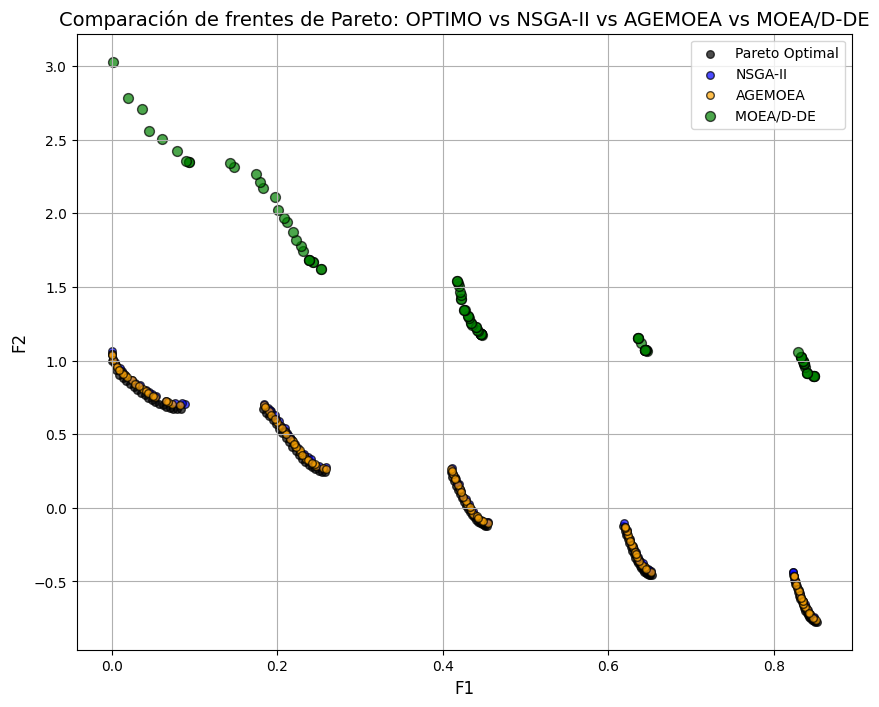

In [56]:
#### VISUALIZACIÓN FRENTES DE PARETO ####

plt.figure(figsize=(10, 8))

# frente de Pareto Optimo
plt.scatter(pareto_optimal[:, 0], pareto_optimal[:, 1], color='black', alpha=0.7, label="Pareto Optimal", edgecolors='black', s=30)

# frente de Pareto obtenido por NSGA-II
plt.scatter(res_nsgaii.F[:, 0], res_nsgaii.F[:, 1], color='blue', alpha=0.7, label="NSGA-II", edgecolors='black', s=30)

# frente de Pareto obtenido por AGEMOEA
plt.scatter(res_agemoea.F[:, 0], res_agemoea.F[:, 1], color='orange', alpha=0.7, label="AGEMOEA", edgecolors='black', s=30)

# frente de Pareto obtenido por MOEA/D-DE
plt.scatter(res_moeadde[:, 0], res_moeadde[:, 1], label="MOEA/D-DE ", color='green', alpha=0.7, edgecolors='black', s=50)


# Etiquetas
plt.xlabel('F1', fontsize=12)
plt.ylabel('F2', fontsize=12)
plt.title('Comparación de frentes de Pareto: OPTIMO vs NSGA-II vs AGEMOEA vs MOEA/D-DE', fontsize=14)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


# **Múltiple Experimentos**



In [57]:
# FUNCIÓN EJECUCIÓN DE 10 EXPERIMENTOS ALGORITMOS PYMOO

termination = get_termination("n_eval", 10000) 

def multiple_experiments(problem, algorithm_class, termination=termination, n_experiments=10, pop_size=100):
    '''
    Ejecuta un algoritmo multiobjetivo sobre un problema dado en múltiples experimentos y calcula 
    las métricas de rendimiento (Hipervolumen, Dispersión y Espaciado) para cada ejecución.

    Parámetros:
    - problem: El problema multiobjetivo a resolver.
    - algorithm_class: La clase del algoritmo de optimización multiobjetivo (por ejemplo, NSGA2).
    - n_experiments: Número de experimentos. Por defecto 10.
    - max_evals: Máximo número de evaluaciones por experimento. Por defecto 10,000.
    - pop_size: Tamaño de la población. Por defecto 100.

    Retorna:
    - Promedio y varianza de las métricas (HV, SPR, SPA).
    - Lista de resultados con los frentes de Pareto obtenidos en cada experimento.
    '''
    
    hv_results = []
    spr_results = []
    spa_results = []
    results = []
    
    for i in range(n_experiments):   
        algorithm = algorithm_class(pop_size=pop_size)
        
        # Optimización
        res = minimize(problem,
                    algorithm,
                    termination=termination,  
                    verbose=False)
        
        # Obtener el frente de Pareto
        pf = res.F  
        
        # Calcular métricas
        hv, spr, spa = calculate_metrics(pf, ref_point=np.array([1.0, 1.0]))  # Asumiendo ref_point como [1, 1]
        print(f"\nMétricas Experimento {i+1}:")
        print(f" Hipervolumen (HV): {hv:.4f} ")
        print(f" Dispersión (SPR): {spr:.4f} ")
        print(f" Espaciado (SPA): {spa:.4f} ")
        
        hv_results.append(hv)
        spr_results.append(spr)
        spa_results.append(spa)
        results.append(res)

    
    # Media y varianza de las métricas 
    avg_hv = np.mean(hv_results)
    var_hv = np.var(hv_results)
    
    avg_spr = np.mean(spr_results)
    var_spr = np.var(spr_results)
    
    avg_spa = np.mean(spa_results)
    var_spa = np.var(spa_results)
    
    print(f"\nResultados Promediados y Variados tras {n_experiments} experimentos:")
    print(f"  Promedio de Hipervolumen (HV): {avg_hv:.5f} | Varianza: {var_hv:.5f}")
    print(f"  Promedio de Dispersión (SPR): {avg_spr:.5f} | Varianza: {var_spr:.5f}")
    print(f"  Promedio de Espaciado (SPA): {avg_spa:.5f} | Varianza: {var_spa:.5f}")
    
    return avg_hv, var_hv, avg_spr, var_spr, avg_spa, var_spa, results



# FUNCIÓN EJECUCIÓN DE 10 EXPERIMENTOS ALGORITMOS PROPUESTO
def multiple_experiments_moeadde(n_experiments=10, npop=100, iterations=100, lb=np.array([0]*30), ub=np.array([1]*30), max_evals=10000):
    '''
    Ejecuta el algoritmo MOEA/D-DE múltiples veces y calcula métricas (Hipervolumen, Dispersión y Espaciado) para cada ejecución.

    Parámetros:
    - n_experiments (int): Número de ejecuciones experimentales. Por defecto, 10.
    - npop (int): Tamaño de la población. Por defecto, 100.
    - iterations (int): Número de iteraciones del algoritmo. Por defecto, 500.
    - lb (array): Límite inferior de las variables de decisión. Por defecto, [0]*30.
    - ub (array): Límite superior de las variables de decisión. Por defecto, [1]*30.
    - max_evals (int): Número máximo de evaluaciones de aptitud. Por defecto, 10,000.

    Retorna:
    - Promedio y varianza de las métricas (HV, SPR, SPA) a través de los experimentos.
    - Lista con los frentes de Pareto obtenidos en cada experimento.
    '''
    hv_results = []
    spr_results = []
    spa_results = []
    results = []

    for i in range(n_experiments):

        pf = main_algorithm(npop, iterations, lb, ub, max_evals=max_evals)

        # calcular métricas
        hv, spr, spa = calculate_metrics(pf, ref_point=np.array([1.0, 1.0]))

        print(f"\nMetrics for Experiment {i + 1}:")
        print(f" Hypervolume (HV): {hv:.4f}")
        print(f" Spread (SPR): {spr:.4f}")
        print(f" Spacing (SPA): {spa:.4f}")

        hv_results.append(hv)
        spr_results.append(spr)
        spa_results.append(spa)
        results.append(pf)

    # calcular media y varianza
    avg_hv = np.mean(hv_results)
    var_hv = np.std(hv_results)

    avg_spr = np.mean(spr_results)
    var_spr = np.std(spr_results)

    avg_spa = np.mean(spa_results)
    var_spa = np.std(spa_results)

    print(f"\nResultados Promediados y Variados tras {n_experiments} experimentos:")
    print(f"  Promedio de Hipervolumen (HV): {avg_hv:.5f} | Varianza: {var_hv:.5f}")
    print(f"  Promedio de Dispersión (SPR): {avg_spr:.5f} | Varianza: {var_spr:.5f}")
    print(f"  Promedio de Espaciado (SPA): {avg_spa:.5f} | Varianza: {var_spa:.5f}")
    
    return avg_hv, var_hv, avg_spr, var_spr, avg_spa, var_spa, results


In [59]:
# Problema
problem = get_problem("zdt3")  

# 1. NSGA-II
print("Ejecutando NSGA-II...")
hv_nsgaii, var_hv_nsgaii, spr_nsgaii, var_spr_nsgaii, spa_nsgaii, var_spa_nsgaii, results_nsgaii = multiple_experiments(problem, NSGA2, n_experiments=10)

Ejecutando NSGA-II...

Métricas Experimento 1:
 Hipervolumen (HV): 1.0086 
 Dispersión (SPR): 1.9864 
 Espaciado (SPA): 0.0135 

Métricas Experimento 2:
 Hipervolumen (HV): 1.0121 
 Dispersión (SPR): 1.9956 
 Espaciado (SPA): 0.0147 

Métricas Experimento 3:
 Hipervolumen (HV): 1.0101 
 Dispersión (SPR): 1.9844 
 Espaciado (SPA): 0.0141 

Métricas Experimento 4:
 Hipervolumen (HV): 1.0041 
 Dispersión (SPR): 1.9850 
 Espaciado (SPA): 0.0147 

Métricas Experimento 5:
 Hipervolumen (HV): 1.0118 
 Dispersión (SPR): 1.9939 
 Espaciado (SPA): 0.0140 

Métricas Experimento 6:
 Hipervolumen (HV): 1.0143 
 Dispersión (SPR): 1.9999 
 Espaciado (SPA): 0.0134 

Métricas Experimento 7:
 Hipervolumen (HV): 1.0059 
 Dispersión (SPR): 1.9994 
 Espaciado (SPA): 0.0149 

Métricas Experimento 8:
 Hipervolumen (HV): 1.0125 
 Dispersión (SPR): 1.9868 
 Espaciado (SPA): 0.0137 

Métricas Experimento 9:
 Hipervolumen (HV): 1.0120 
 Dispersión (SPR): 2.0151 
 Espaciado (SPA): 0.0141 

Métricas Experimento 10

In [60]:
# Problema
problem = get_problem("zdt3")  

# 2. AGEMOEA
print("Ejecutando AGEMOEA...")
hv_agemoea, var_hv_agemoea, spr_agemoea, var_spr_agemoea, spa_agemoea, var_spa_agemoea, results_agemoea = multiple_experiments(problem, AGEMOEA, n_experiments=10,  pop_size=100)

Ejecutando AGEMOEA...

Métricas Experimento 1:
 Hipervolumen (HV): 1.0062 
 Dispersión (SPR): 1.9865 
 Espaciado (SPA): 0.0146 

Métricas Experimento 2:
 Hipervolumen (HV): 1.0137 
 Dispersión (SPR): 1.9885 
 Espaciado (SPA): 0.0139 

Métricas Experimento 3:
 Hipervolumen (HV): 1.0206 
 Dispersión (SPR): 2.0158 
 Espaciado (SPA): 0.0132 

Métricas Experimento 4:
 Hipervolumen (HV): 1.0052 
 Dispersión (SPR): 2.0018 
 Espaciado (SPA): 0.0147 

Métricas Experimento 5:
 Hipervolumen (HV): 0.9631 
 Dispersión (SPR): 1.6147 
 Espaciado (SPA): 0.0117 

Métricas Experimento 6:
 Hipervolumen (HV): 1.0174 
 Dispersión (SPR): 1.9955 
 Espaciado (SPA): 0.0135 

Métricas Experimento 7:
 Hipervolumen (HV): 1.0161 
 Dispersión (SPR): 1.9800 
 Espaciado (SPA): 0.0139 

Métricas Experimento 8:
 Hipervolumen (HV): 1.0138 
 Dispersión (SPR): 1.9893 
 Espaciado (SPA): 0.0138 

Métricas Experimento 9:
 Hipervolumen (HV): 1.0149 
 Dispersión (SPR): 1.9849 
 Espaciado (SPA): 0.0129 

Métricas Experimento 10

In [61]:
# Problema
problem = get_problem("zdt3")  

# 3. MOEAD/DE
print("Ejecutando MOEAD/D-DE...")
hv_moeadde, var_hv_moeadde,spr_moeadde, var_spr_moeadde, spa_moeadde, var_spa_moeadde , results_moeadde= multiple_experiments_moeadde()

Ejecutando MOEAD/D-DE...
Iteración 10 completada. Evaluaciones: 1000/10000
Iteración 20 completada. Evaluaciones: 2000/10000
Iteración 30 completada. Evaluaciones: 3000/10000
Iteración 40 completada. Evaluaciones: 4000/10000
Iteración 50 completada. Evaluaciones: 5000/10000
Iteración 60 completada. Evaluaciones: 6000/10000
Iteración 70 completada. Evaluaciones: 7000/10000
Iteración 80 completada. Evaluaciones: 8000/10000
Iteración 90 completada. Evaluaciones: 9000/10000

Metrics for Experiment 1:
 Hypervolume (HV): 0.0336
 Spread (SPR): 2.7783
 Spacing (SPA): 0.0170
Iteración 10 completada. Evaluaciones: 1000/10000
Iteración 20 completada. Evaluaciones: 2000/10000
Iteración 30 completada. Evaluaciones: 3000/10000
Iteración 40 completada. Evaluaciones: 4000/10000
Iteración 50 completada. Evaluaciones: 5000/10000
Iteración 60 completada. Evaluaciones: 6000/10000
Iteración 70 completada. Evaluaciones: 7000/10000
Iteración 80 completada. Evaluaciones: 8000/10000
Iteración 90 completada. Ev

Visualización de los mejores resultados **según el valor del hipervolúmen**

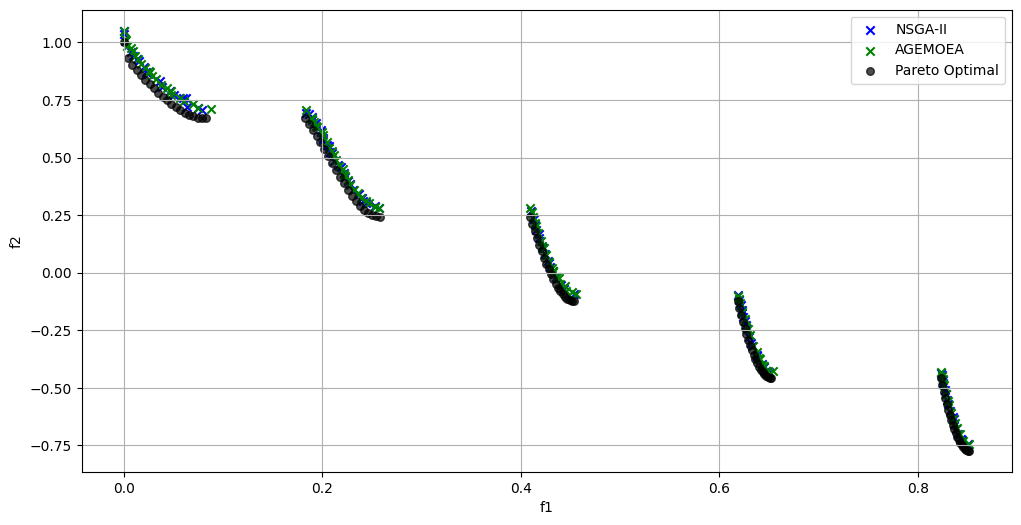

In [63]:
#### FRENTE DE MEJORES RESULTADOS ####

best_experiment_index_nsgaii = np.argmax(hv_nsgaii)  
best_pf_nsgaii = results_nsgaii[best_experiment_index_nsgaii].F 
best_experiment_index_agemoea = np.argmax(hv_agemoea)  
best_pf_agemoea = results_agemoea[best_experiment_index_agemoea].F 
best_experiment_index_moeadde = np.argmax(hv_moeadde)  
best_pf_moeadde = results_moeadde[best_experiment_index_moeadde]  


plt.figure(figsize=(12, 6))
plt.scatter(best_pf_nsgaii[:, 0], best_pf_nsgaii[:, 1], label="NSGA-II", color='blue',marker='x')
plt.scatter(best_pf_agemoea[:, 0], best_pf_agemoea[:, 1], label="AGEMOEA", color='green',marker='x')
#plt.scatter(best_pf_moeadde[:, 0], best_pf_moeadde[:, 1], label="MOEAD/D-DE", color='red')
# frente de Pareto Optimo
plt.scatter(pareto_optimal[:, 0], pareto_optimal[:, 1], color='black', alpha=0.7, label="Pareto Optimal", edgecolors='black', s=30)

plt.xlabel("f1")
plt.ylabel("f2")
plt.legend()
plt.grid(True)
plt.show()

- Hipervolumen (HV): Una medida del volumen del espacio objetivo dominado por el frente de Pareto obtenido
- Dispersión (SPR): Una medida de cuán dispersas están las soluciones en el espacio objetivo.
- Espaciado (SPA): Mide la uniformidad de la distribución de las soluciones.


Según los resultados de los 10 experimentos, NSGA-II y AGEMOEA tienen un rendimiento similar, con AGEMOEA mostrando una ligera ventaja en términos de hipervolumen. MOEA/D-DE parece ser menos efectivo para el problema ZDT3, especialmente en términos de aproximación del frente de Pareto y diversidad. Cabe destacar que con un valor del número de evaluaciones  de fitness de 100000 se obtienen los mejores resultados, más próximos a las soluciones de pareto óptimo debido debido que  explora de manera más exhaustiva el espacio de soluciones debido a la mutación diferencial; tiene más tiempo para adaptarse y encontrar soluciones más cercanas al frente de Pareto óptimo a medida que aumentan las evaluaciones, aprovechando la exploración y explotación a través de mutaciones y la actualización de soluciones vecinas.
Para evaluaciones más rápidas como son 10000 evaluaciones NSGA-II y AGEMOEA destacan.


Aunque NSGA-II muestra un desempeño ligeramente superior en términos de hipervolumen (HV) y dispersión (SPR), AGE-MOEA presenta ciertas ventajas que lo hacen más adecuado para problemas como ZDT3, especialmente en lo que respecta a la distribución de soluciones. El valor de hipervolumen de NSGA-II es de 1.00936, ligeramente superior al de AGE-MOEA, que alcanza 1.00761. Sin embargo, la diferencia en los valores de hipervolumen no es sustancial, lo que sugiere que ambos algoritmos son igualmente efectivos en cuanto a la convergencia hacia el frente de Pareto. En términos de dispersión (SPR), NSGA-II presenta una puntuación de 1.99404, mientras que AGE-MOEA tiene 1.95453. Aunque nuevamente NSGA-II tiene una ligera ventaja, la diferencia es mínima, lo que indica que ambos algoritmos mantienen una buena distribución de las soluciones.

Lo que realmente diferencia a AGE-MOEA es su capacidad para distribuir las soluciones de manera más uniforme a lo largo del frente de Pareto, lo cual se refleja en el valor de espaciado (SPA). En este caso, el espaciado promedio de AGE-MOEA es 0.01356, ligeramente superior al de NSGA-II con 0.01413, lo que sugiere una distribución más consistente de las soluciones a lo largo del frente. Además, AGE-MOEA tiene un enfoque adaptativo en la estimación de la geometría del frente de Pareto, lo que le permite ajustarse mejor a diferentes formas no euclidianas que pueden caracterizar la frontera de Pareto en problemas complejos. Esta capacidad adaptativa es crucial en problemas con múltiples objetivos, como ZDT3, donde la geometría del frente de Pareto puede ser irregula